# Case Study Project - Travel Insurance
### Task Highlights:
1. Check for differences in the travel habits between customers and non-customer.
2. Derive insight that can help the marketing strategy




In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection
The first step of a data science and business analytics task is to obtain, gather, and measure the necessary and targeted data from available internal or external data sources, and then compiled into an established system. In this case, Travel Insurance dataset is used.

In [2]:
df = pd.read_csv("travel_insurance.csv")
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Data Preprocessing
Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.
Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.
As the first step, null values within the dataset will be identified, and appropriately replaced if possible.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


The dataset contains 1987 rows of records and 9 columns of attributes. The data types of the attributes consist of 4 qualitative discrete categorical, 5 quantitative discrete numerical integer,
The memory space usage is at least 139 kilobytes (KB).

Through this, it is found that there are no null values present in the dataset.

For the next step, unique() is used to check qualitative data for noises of impossible values such as incorrect mispelt data entries, or errors of inconsistent data such as not comparable numerical measurement formats and data types.

In [4]:
# display unique categories for qualitative attributes
cat_features = [i for i in df.columns]
for j in cat_features:
    print(j)
    print(sorted(df[j].unique())) # sort in alphabetical order

Age
[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Employment Type
['Government Sector', 'Private Sector/Self Employed']
GraduateOrNot
['No', 'Yes']
AnnualIncome
[300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1050000, 1100000, 1150000, 1200000, 1250000, 1300000, 1350000, 1400000, 1450000, 1500000, 1550000, 1650000, 1700000, 1750000, 1800000]
FamilyMembers
[2, 3, 4, 5, 6, 7, 8, 9]
ChronicDiseases
[0, 1]
FrequentFlyer
['No', 'Yes']
EverTravelledAbroad
['No', 'Yes']
TravelInsurance
[0, 1]


Through this, it is found that there are no impossible values or errors of inconsistent values.

In relation to the unique values, their count can be computed.

In [5]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

Data integration is not needed, since only one dataset is used with no schema integrations, and thus no discernable entity identification issues or data value conflicts.
 Data reduction is also not needed since each column is unique and there is no redundancy
A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

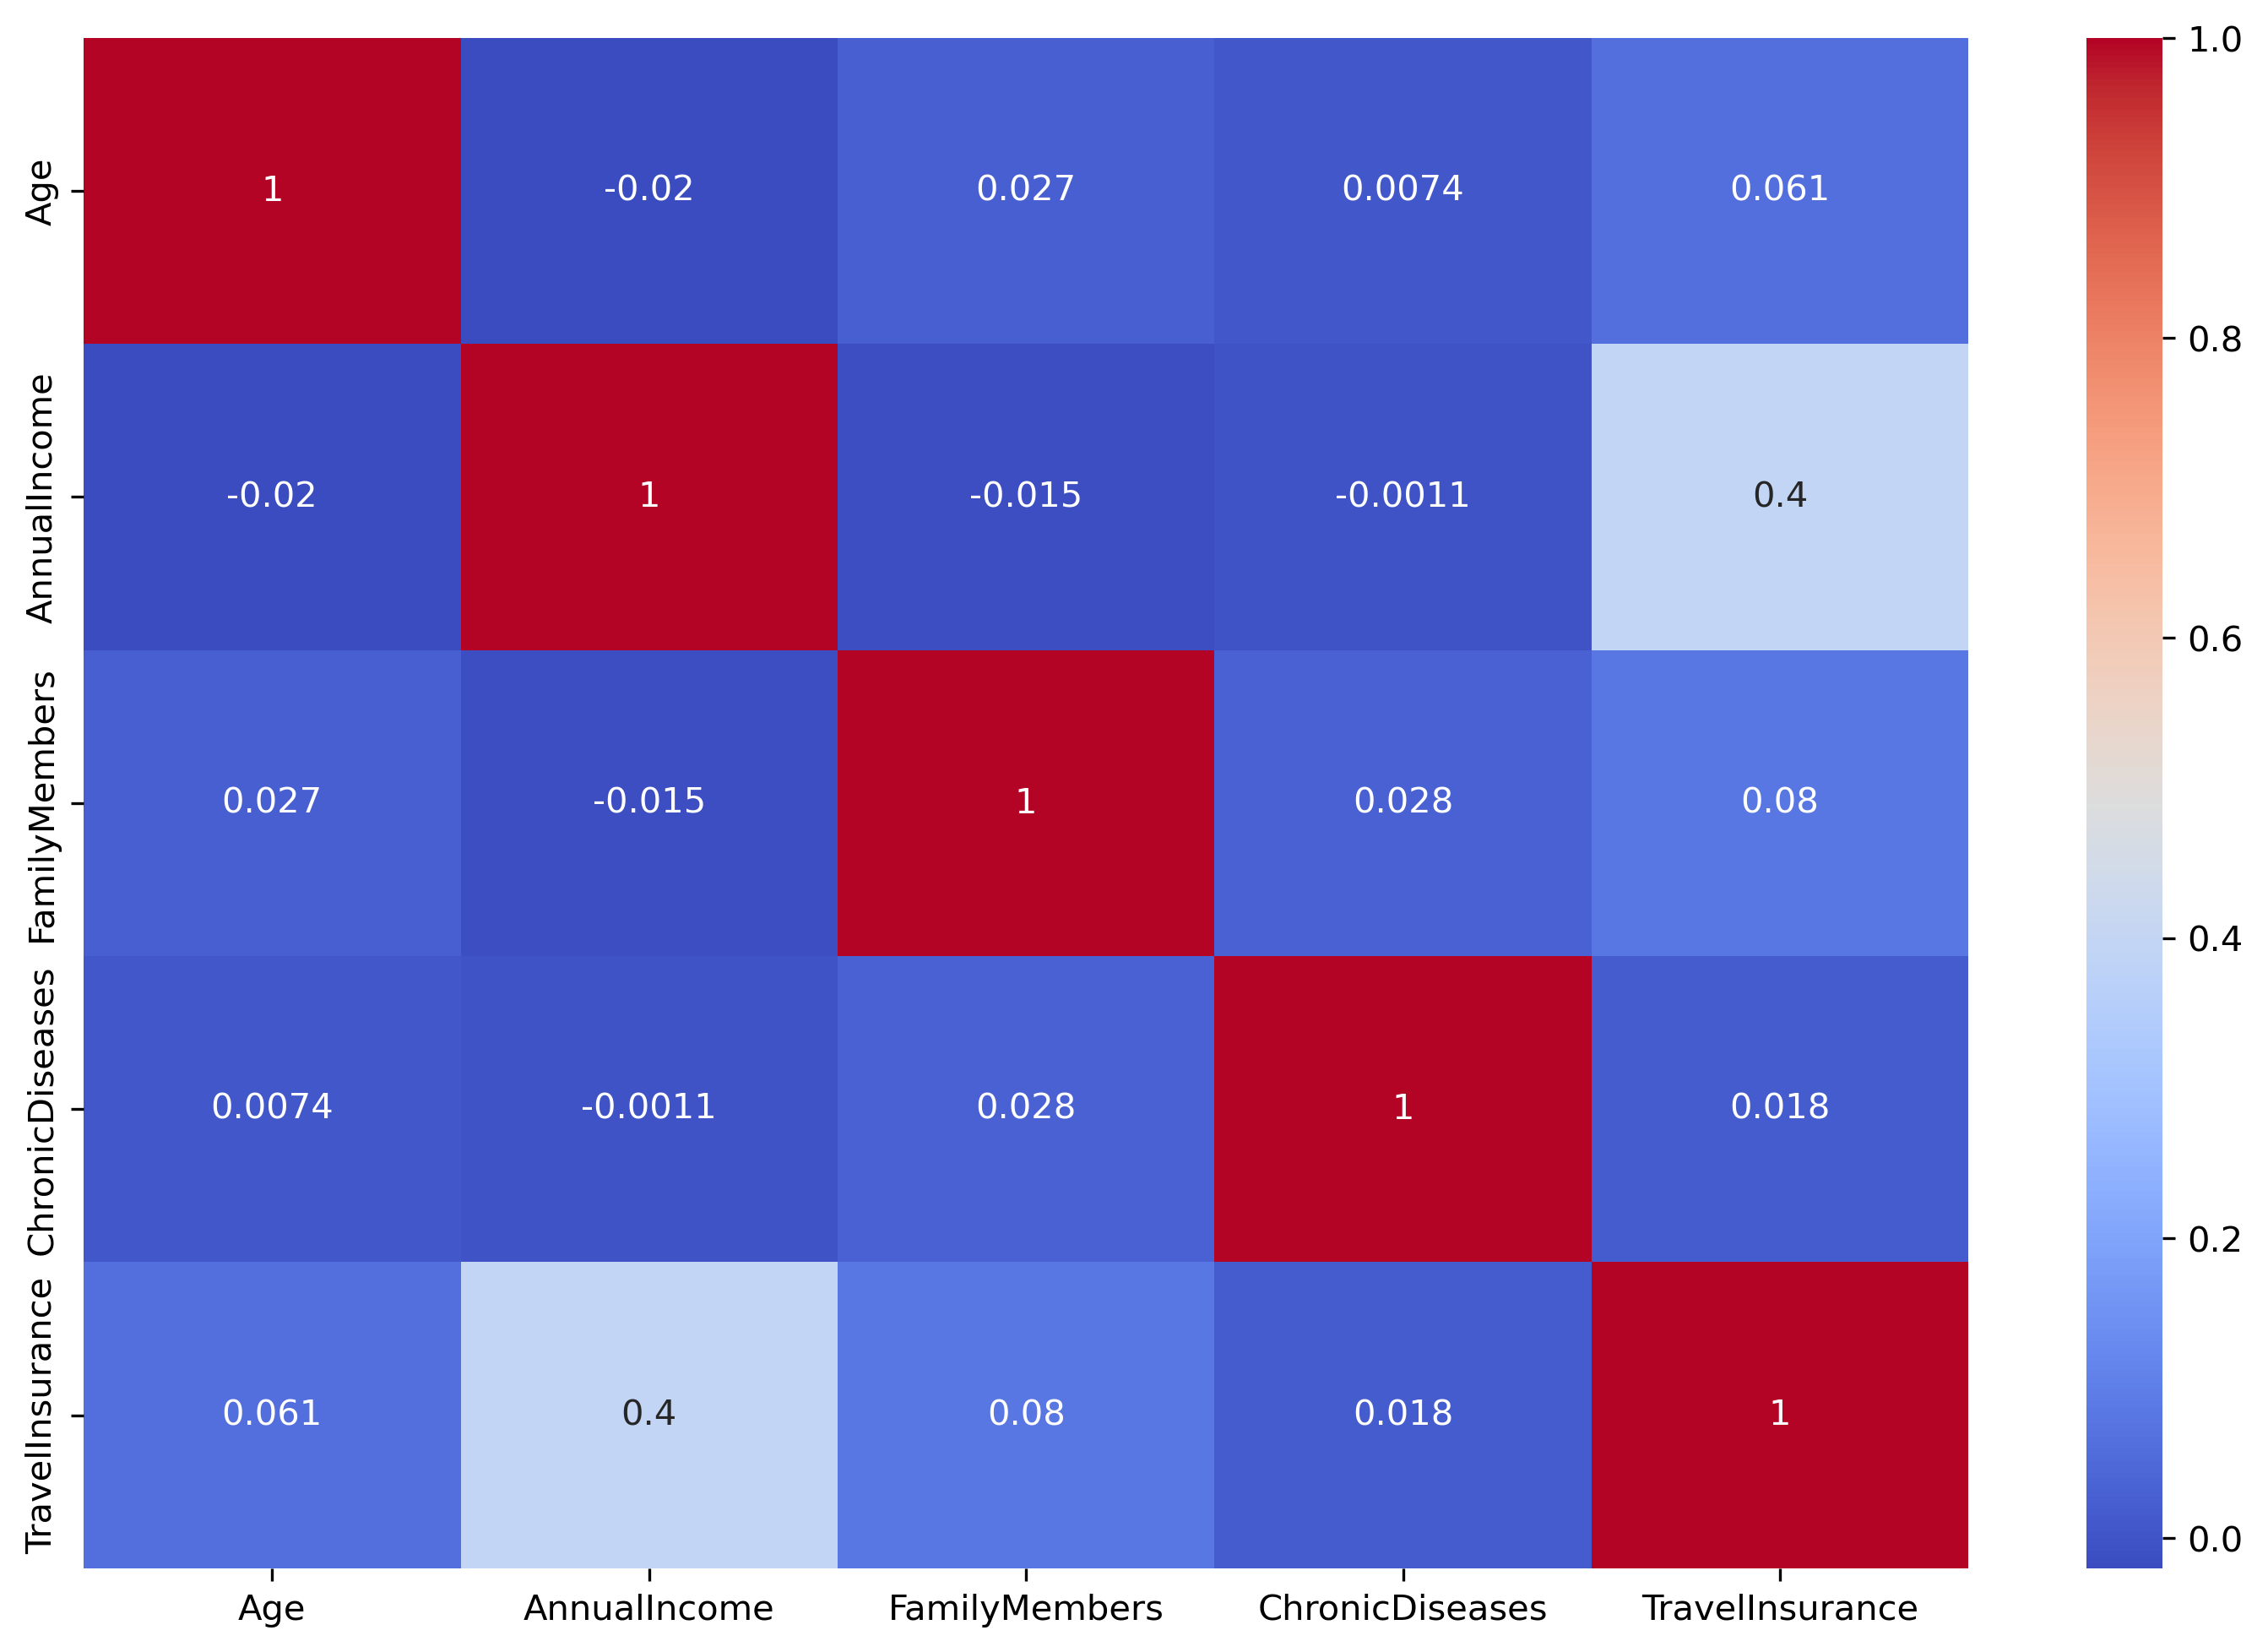

In [6]:
# compare linear relationships between attributes using correlation coefficient generated using
    # correlation matrix
plt.figure(figsize=(12,8), dpi = 300)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In this case, the strongest correlation is 0.4 between Travel Insurance and Annual Income.
We will explore it further in the EDA section

In [7]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


Data pre-processing is now complete
## Exploratory Data Analysis (EDA)
EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help Travel Assured to identify concern areas and problems, and the resolution of these can help with advertising in the right places and to the right people.

First, the summary statistics will be considered.

In [8]:
# summary statistics of the attributes, including measures of central tendency and 
    # measures of dispersion
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


The minimum age for people that looked into travel insurance is 25 and maximum age is 35

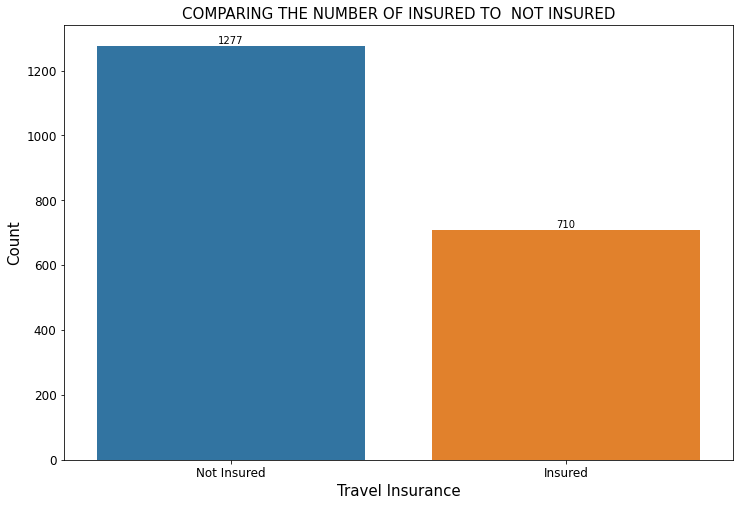

In [9]:
plt.figure(figsize=(12,8))
g=sns.countplot(
    data=df, x="TravelInsurance"
)
positions = (0, 1)
labels = ("Not Insured", "Insured")
plt.xticks(positions, labels, size=12)
plt.yticks(size=12)
g.set_xlabel("Travel Insurance", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
g.bar_label(g.containers[0])
g.set_title("COMPARING THE NUMBER OF INSURED TO  NOT INSURED", size=15)
plt.show()

* Looking further into the relationship of the customers and non customers, there is almost twice the number of non customers than there is customers.
* There is an inbalance in the data, due to the data imbalance, we can explore the data as a percentage rather than a counts

In [14]:
def percentages(arg):
    return (np.sum(arg)/len(arg))*100
cropped_df = df.drop(['Age','AnnualIncome','FamilyMembers'], axis = 1)
cropped_df =pd.get_dummies(cropped_df, drop_first=True)
percentage_df = cropped_df.groupby('TravelInsurance').apply(percentages)
percentage_df.index =('Not Insured', 'Insured')
percentage_df.columns = ('Has Chronic Disease', 'Travell Insurance', 
                           'Private Sector/Self Employed', ' Is Graduate', ' Is Frequent flyer', 
                           'Has Travelled Abroad')
percentage_df = percentage_df.round(2)
percentage_df

,Has Chronic Disease,Travell Insurance,Private Sector/Self Employed,Is Graduate,Is Frequent flyer,Has Travelled Abroad
Not Insured,27.17,0.0,66.33,84.65,13.94,6.42
Insured,28.87,100.0,80.28,86.06,33.66,41.97


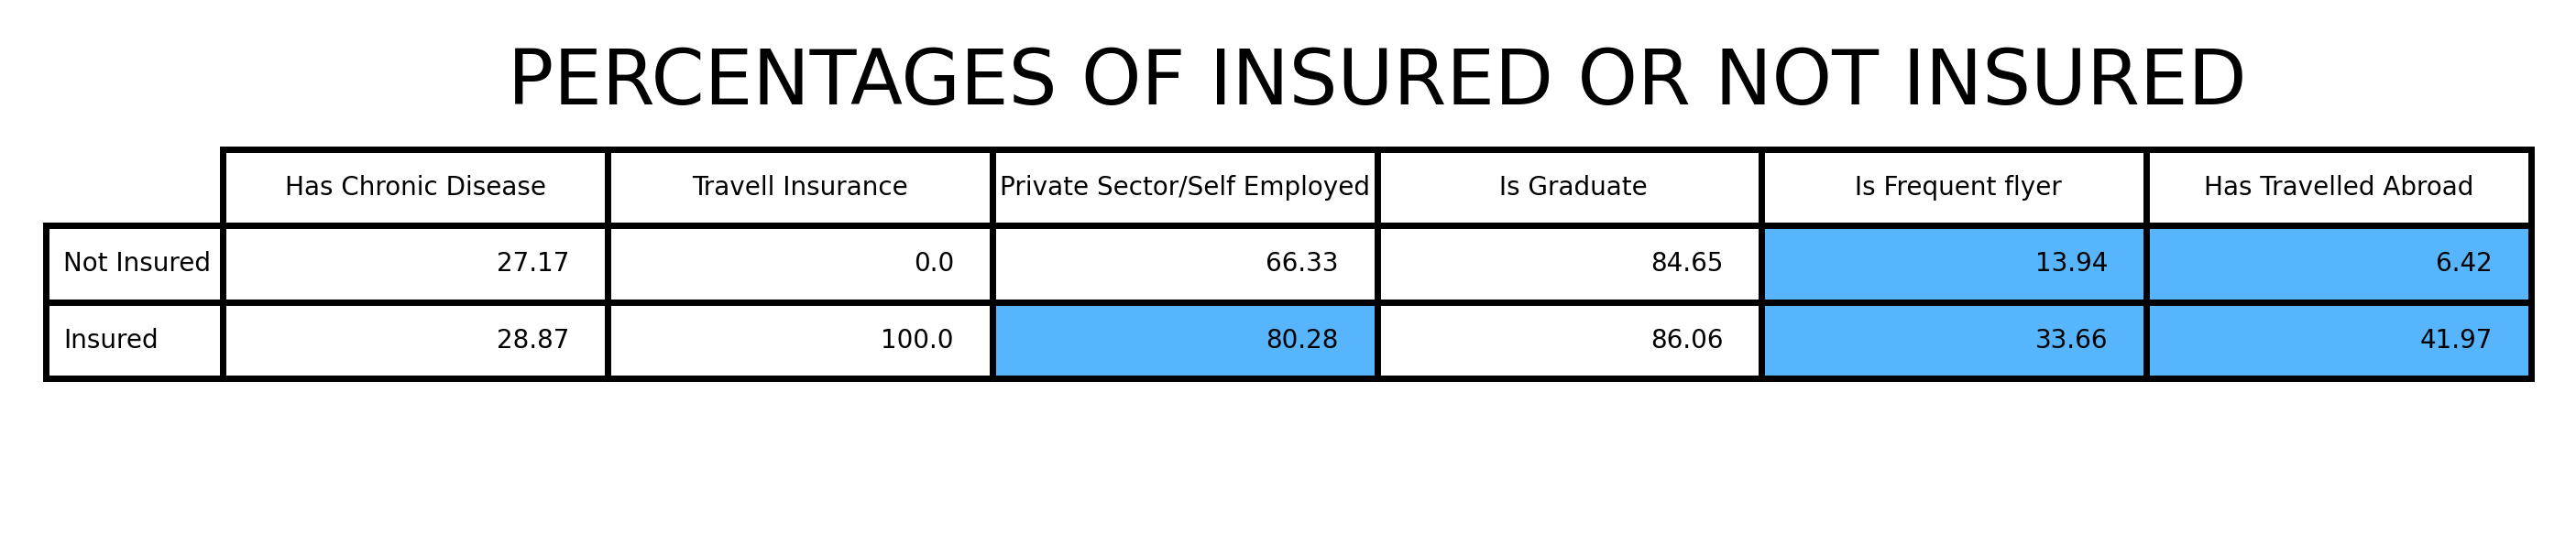

In [24]:
fig = plt.figure(figsize = (6.5, 1), dpi = 500)
ax = fig.add_subplot(111)

table1=ax.table(cellText = percentage_df.values,
          rowLabels = percentage_df.index,
          colLabels = percentage_df.columns,
          loc = "upper center"
         )
ax.set_title("PERCENTAGES OF INSURED OR NOT INSURED")
table1.auto_set_font_size(False)
table1.set_fontsize(4)
table1[(1, 4)].set_facecolor("#56b5fd")
table1[(1, 5)].set_facecolor("#56b5fd")
table1[(2, 2)].set_facecolor("#56b5fd")
table1[(2, 4)].set_facecolor("#56b5fd")
table1[(2, 5)].set_facecolor("#56b5fd")
table1
ax.axis("off");

After taking percentages, some cells stand out.
* 6.42% of people not insured have traveled abroad. 95.6% of people who did not buy insurance have not traveled abroad. 
* As much as 41.97% of customers have travelled abroad
* Only 13.94% of people not insured are frequent fliers. In otherwords,  about 86% of people who did not buy insurance are not frequent fliers.
* 33.6% of customers are frequent fliers
* 80.2% of customers are private sector / self employed workers.

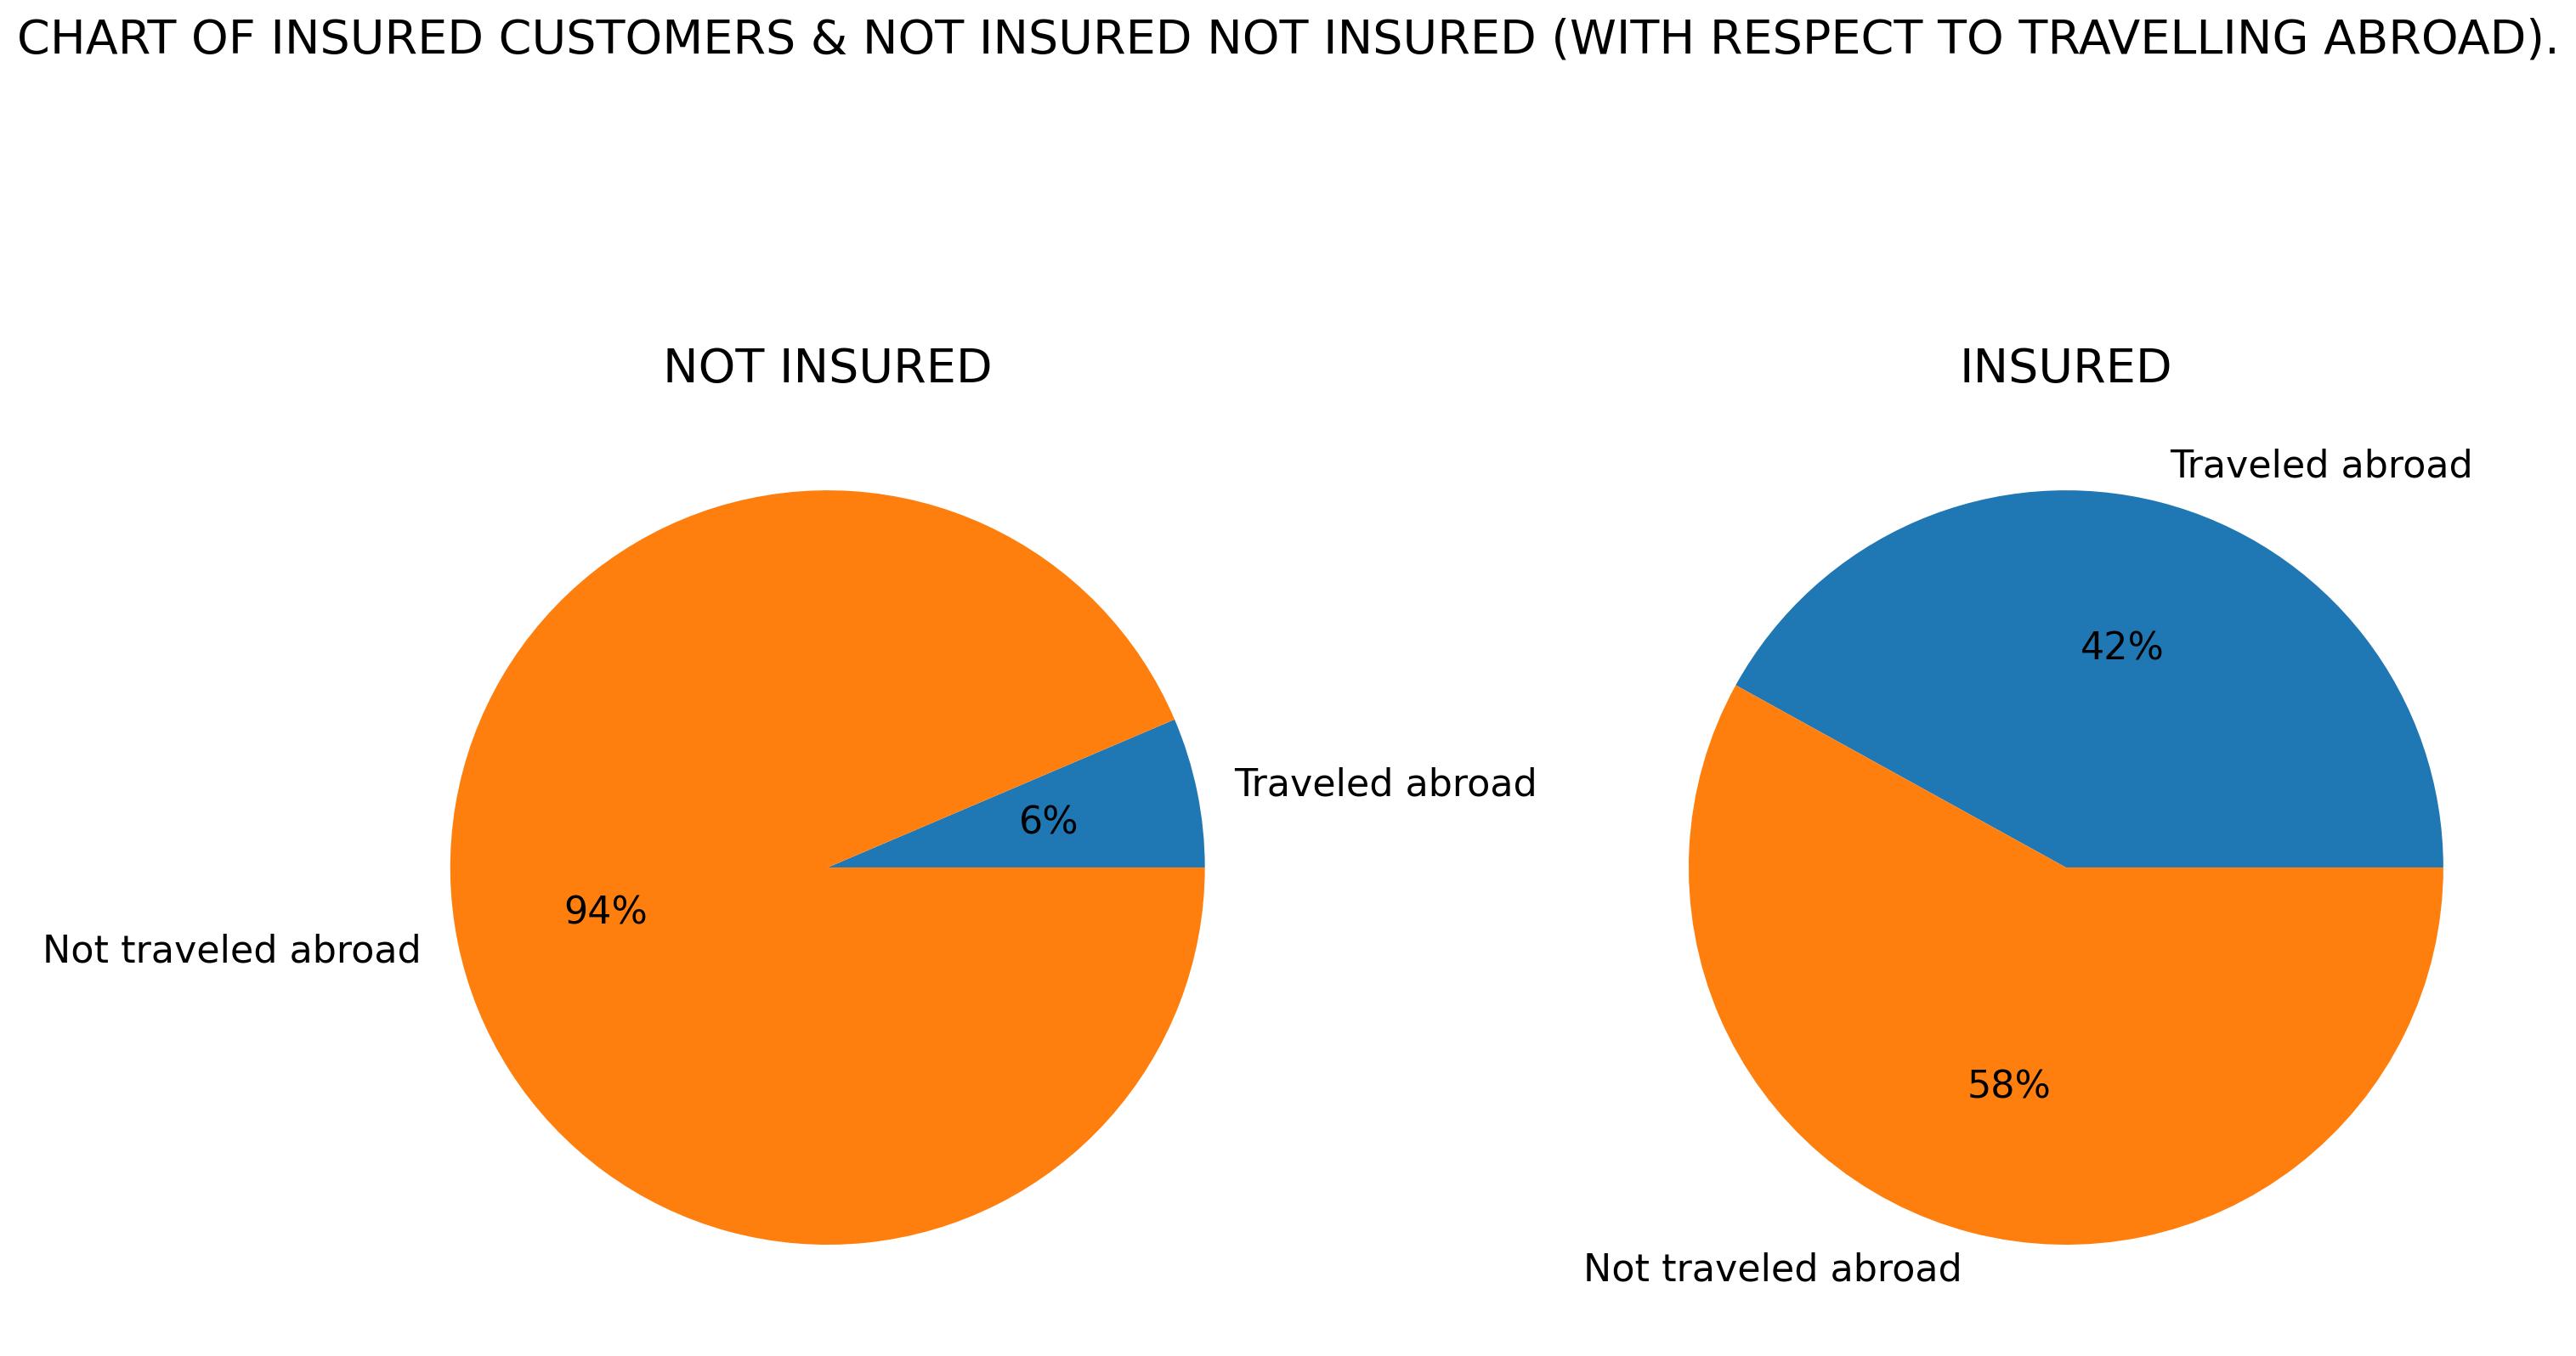

In [35]:

fig,ax = plt.subplots(1,2, figsize = (15,10), dpi = 200)
ax[0].pie((6.42,100-6.42), labels =('Traveled abroad', 'Not traveled abroad'),autopct='%.0f%%', textprops={'fontsize': 16})
ax[1].pie((41.97,100-41.97), labels =('Traveled abroad', 'Not traveled abroad'), autopct='%.0f%%', textprops={'fontsize': 16})
ax[0].set_title('NOT INSURED', size = 20)
ax[1].set_title('INSURED', size = 20)
fig.suptitle('CHART OF INSURED CUSTOMERS & NOT INSURED NOT INSURED (WITH RESPECT TO TRAVELLING ABROAD).',
             size = 20)
fig.tight_layout()


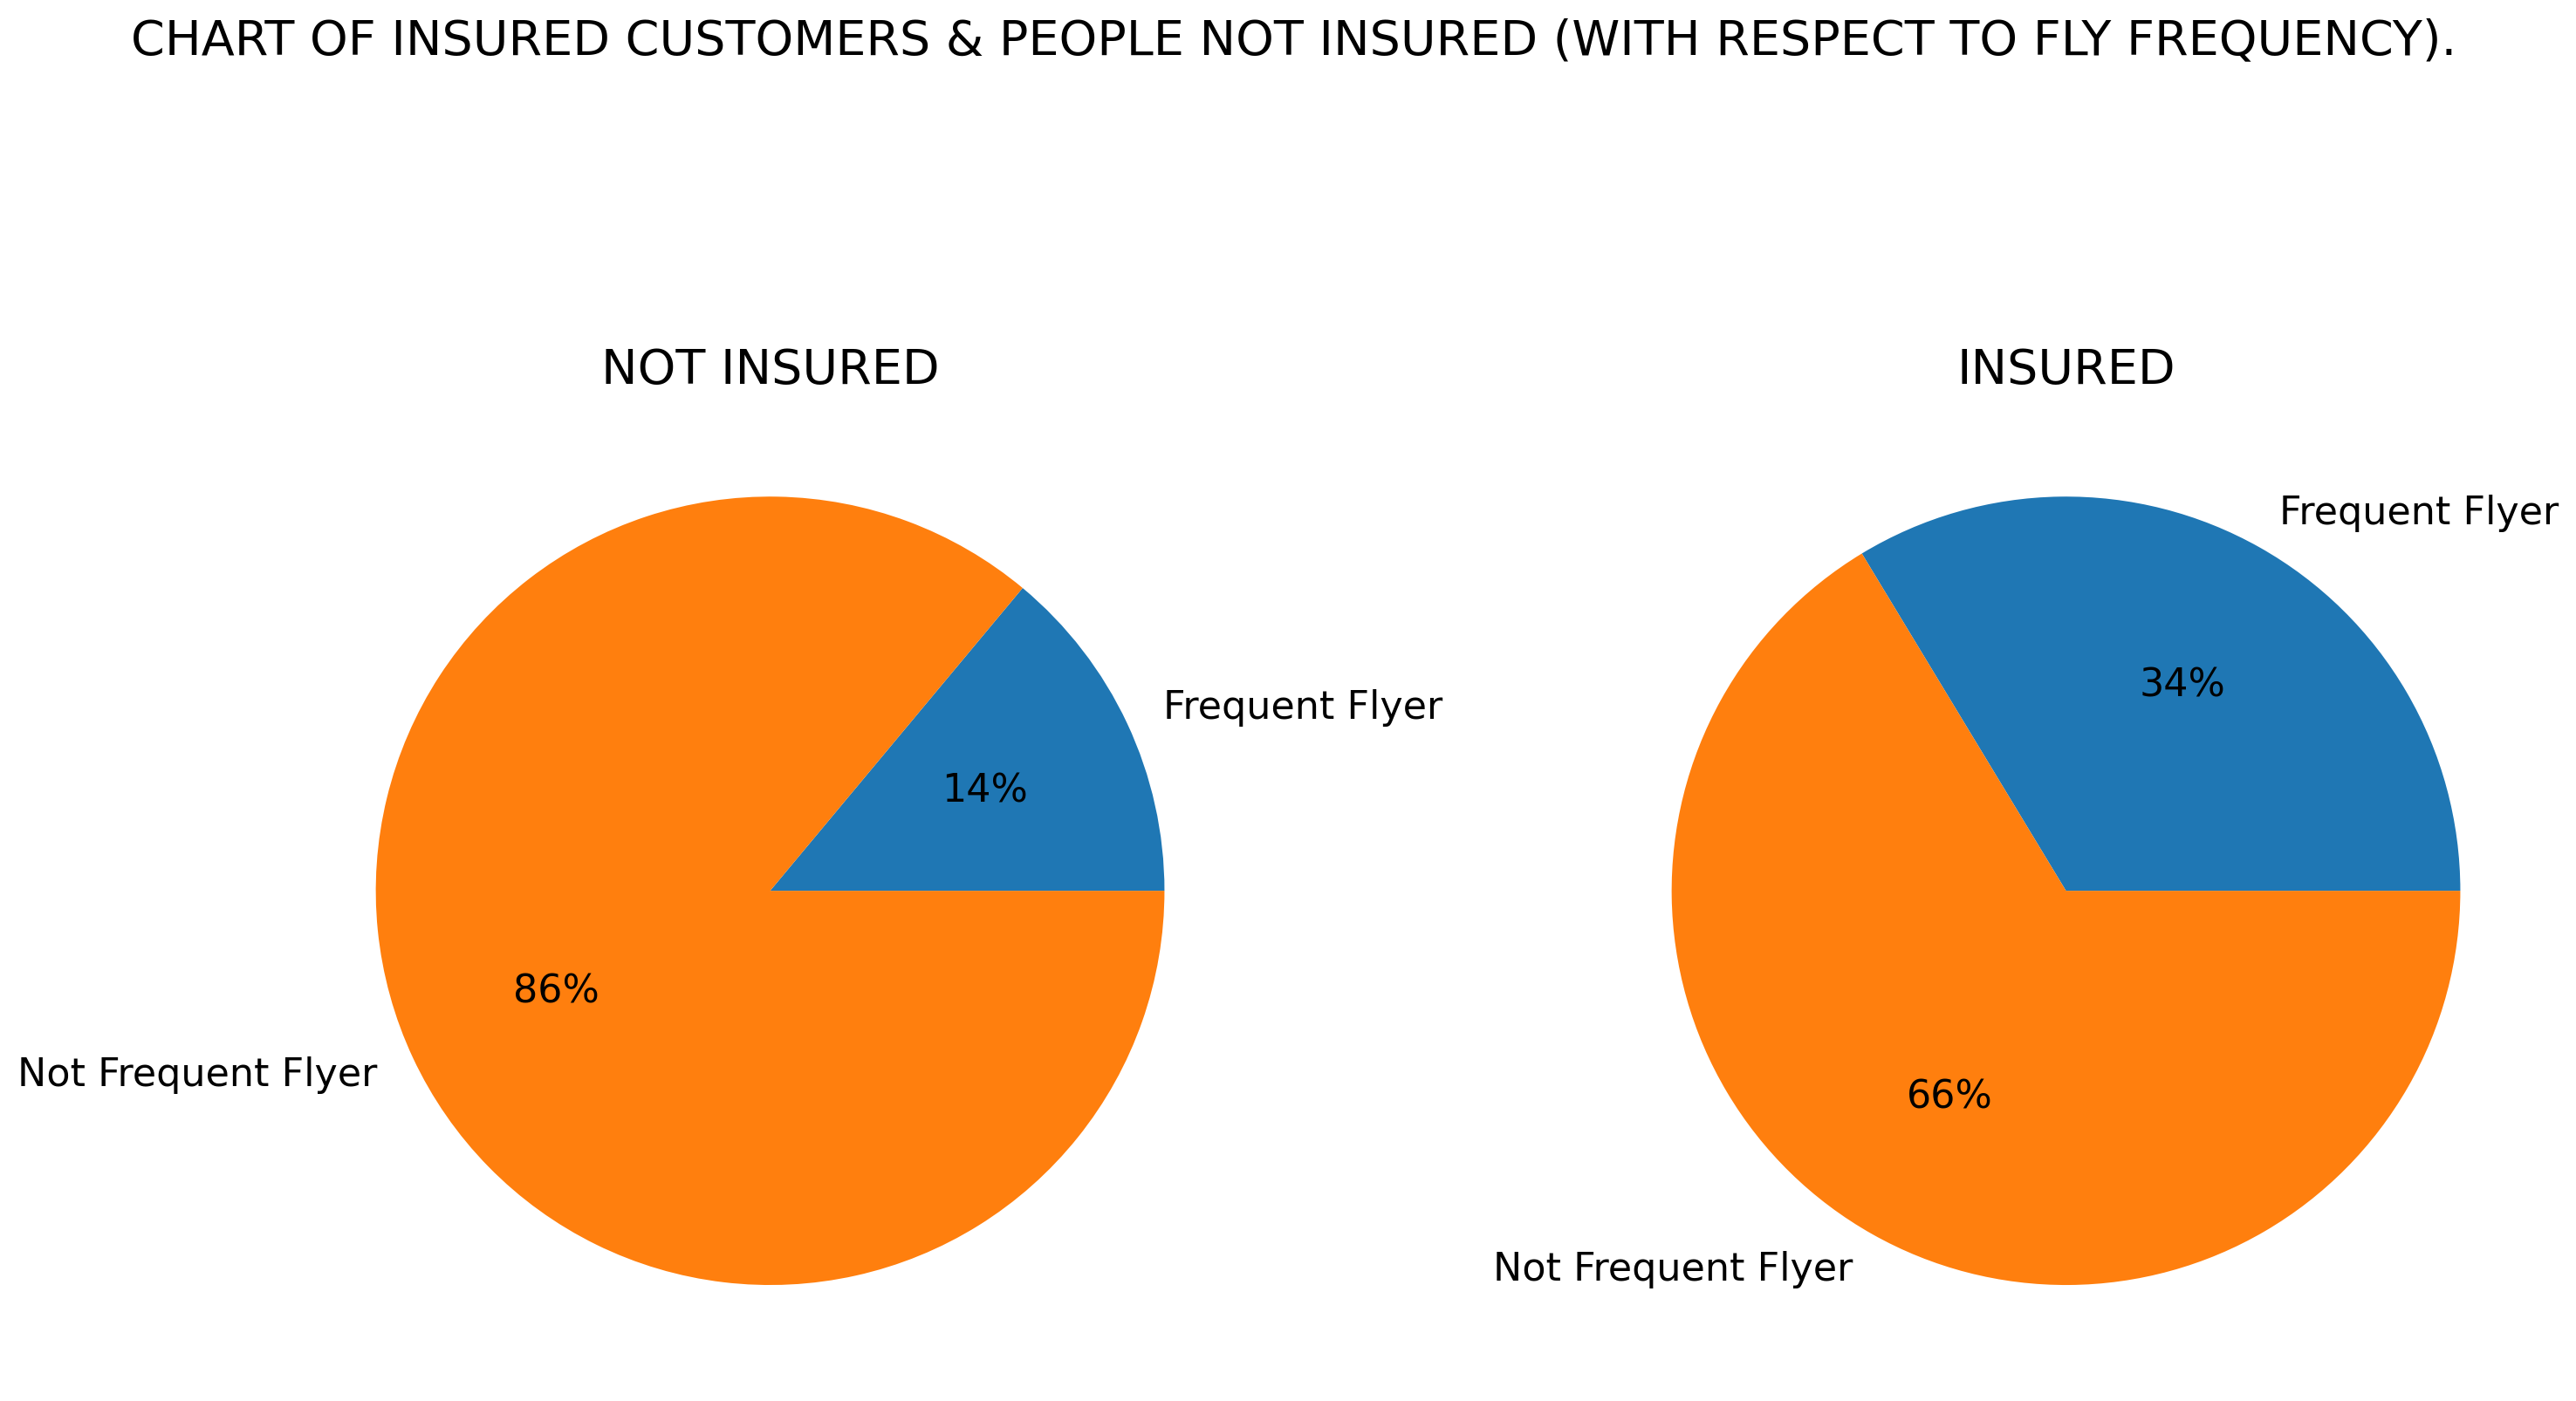

In [36]:
fig,ax = plt.subplots(1,2, figsize = (15,10), dpi =200)
ax[0].pie((13.94,100-13.94), labels =('Frequent Flyer', 'Not Frequent Flyer'),autopct='%.0f%%', textprops={'fontsize': 16})
ax[1].pie((33.66,100-33.66), labels =('Frequent Flyer', 'Not Frequent Flyer'), autopct='%.0f%%', textprops={'fontsize': 16})
ax[0].set_title('NOT INSURED', size = 20)
ax[1].set_title('INSURED', size = 20)
fig.suptitle('CHART OF INSURED CUSTOMERS & PEOPLE NOT INSURED (WITH RESPECT TO FLY FREQUENCY).',
             size = 20)
fig.tight_layout()

* About 6% of the people that got qoutes but did not buy the insurance have traveled abroad.
* 42% of our customers traveled abroad
* 86% of the people that got qoutes but did not buy insurance are not frequent flyers
* 34% of our customers are frequent flyers

## Recommendations
1. To help with the new marketing strategy, Travel Assured should give special consideration to  **Frequent Flyers and people who have traveled abroad.**

Text(0.5, 1.0, 'CHART OF CUSTOMERS WITH RESPECT TO EMPLOYMENT TYPE')

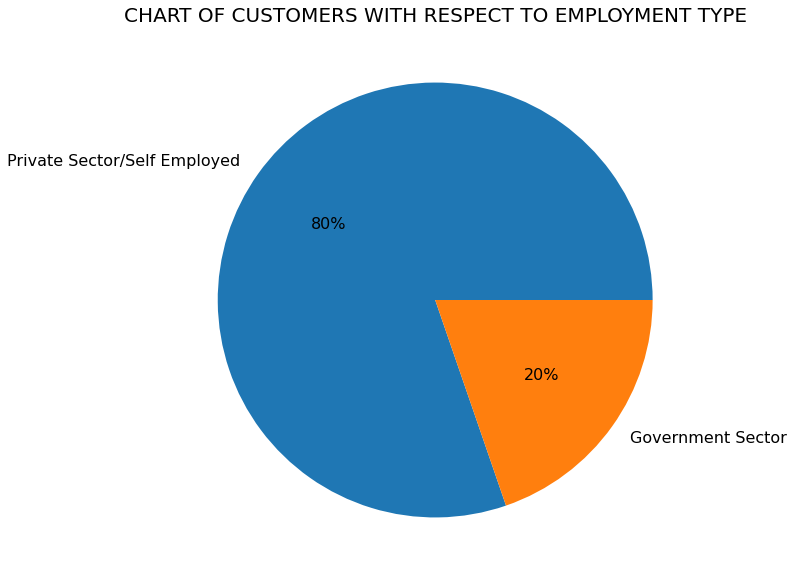

In [51]:
plt.figure(figsize =(10,10))
plt.pie((80.28,100-80.28), labels =('Private Sector/Self Employed', 'Government Sector'),
        autopct='%.0f%%', textprops={'fontsize': 16});
plt.title('CHART OF CUSTOMERS WITH RESPECT TO EMPLOYMENT TYPE', size = 20,)

## Recommendation

2. Over 80% of our customers are working in the private sector, Travel Assured should give more consideration to the private sector/self employed workers


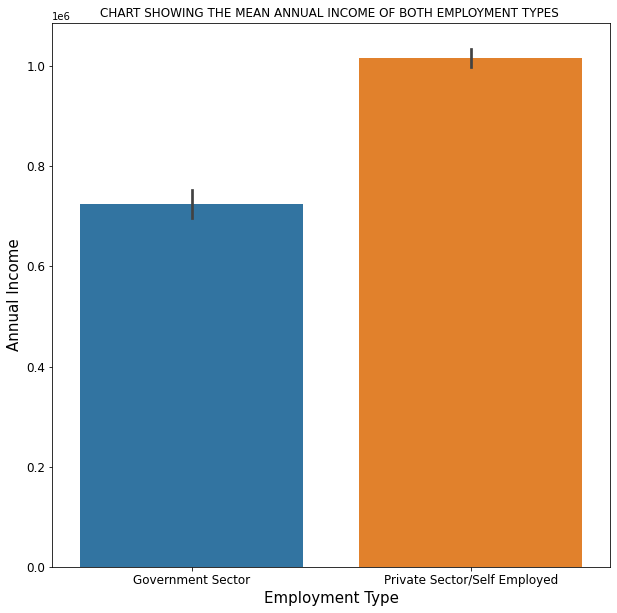

In [49]:
plt.figure(figsize = (10,10))
g=sns.barplot(data = df, x ='Employment Type', y = 'AnnualIncome')
plt.xticks(size=12)
plt.yticks(size=12)
g.set_xlabel("Employment Type", fontsize = 15)
g.set_ylabel("Annual Income", fontsize = 15)
plt.title('CHART SHOWING THE MEAN ANNUAL INCOME OF BOTH EMPLOYMENT TYPES ')
plt.show()

Result from a comparism of Employment Type and Annual Income further serves as additional evidence that customers in the private sector/self employed should be given more consideration because Travel Assured receives greater patronage from higher income earners.
## Recommendation
3. The plot above shows that on the average, Private Sector/Self Employed workers earn more than Government Sector workers. Considering this, it is sensible to give more consideration to Private Sector and self employed workers and less to Government Sector workers in the new marketing strategy.


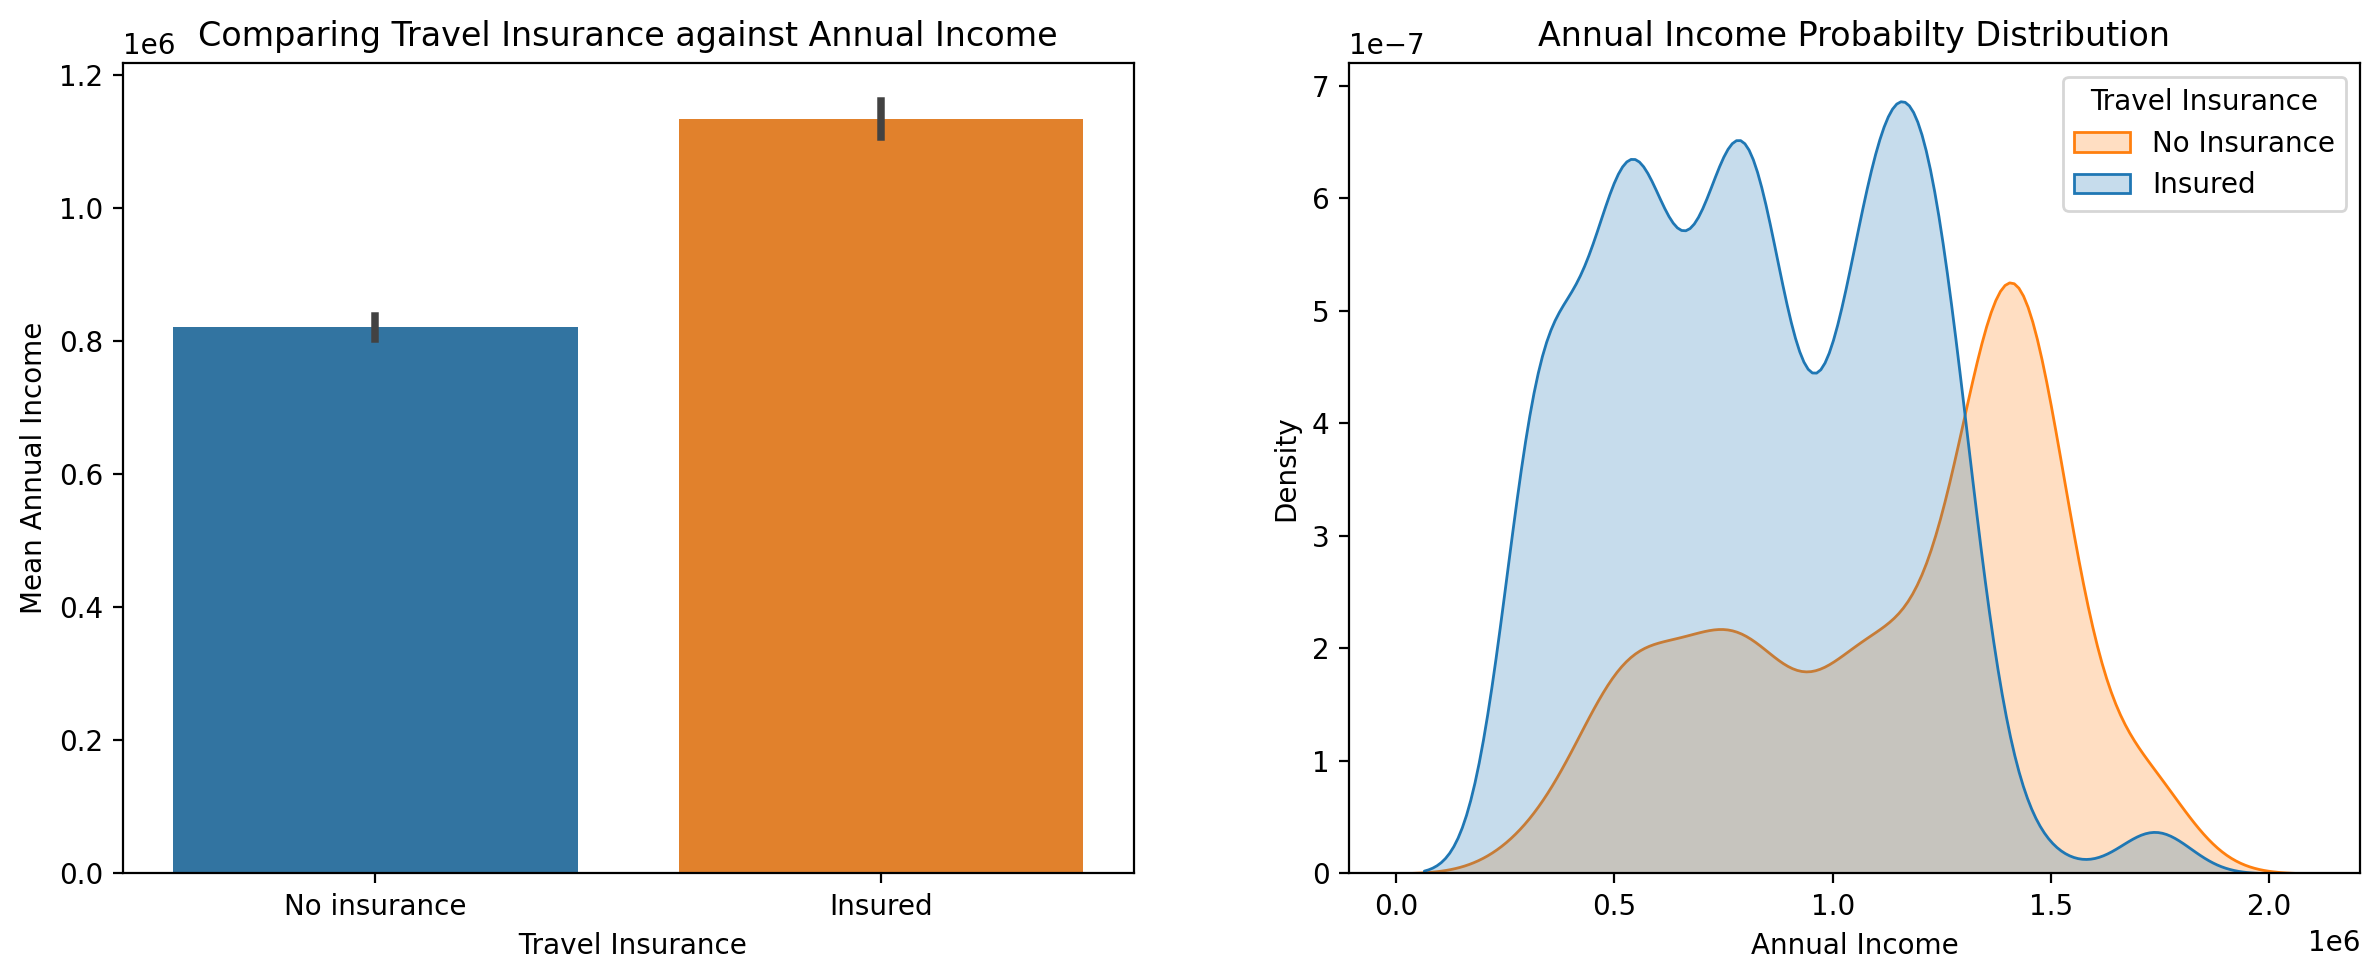

In [50]:
fig,ax = plt.subplots(1,2,figsize = (12,5), dpi = 200)
sns.barplot(data = df, x = 'TravelInsurance', y = 'AnnualIncome', ax = ax[0])
sns.kdeplot(data = df, x = 'AnnualIncome', hue = 'TravelInsurance', ax =ax[1], fill=True)
ax[1].legend(title='Travel Insurance', loc='upper right', labels=['No Insurance', 'Insured'])
ax[1].set(title = 'Annual Income Probabilty Distribution', xlabel = 'Annual Income')
ax[0].set(xlabel=" Travel Insurance", 
          ylabel="Mean Annual Income", xticks = [0,1],
          xticklabels=['No insurance', 'Insured'],
          title = 'Comparing Travel Insurance against Annual Income')
fig.tight_layout(w_pad = 5)


#### Exploring more on high income earners
 * On the left is a visual plot of Travel Insurance against Mean Annual Income. The plot shows that on average, our customers have higer Annual Income compared to non customers who have no insurance.
 * Similarly, on the right is a distribution plot of Annual income for both customers and non customers. The distribution for customers is skewed to right. This is another indication that people with high annual income have a higher probabilty to buy insurance at Travel Assured. Conversely, the distribution for non customers is skewed to the left, indicating less possibility of buying insurance for people who earn less. 

## Recommendation
 4. In its new marketing strategy, Travel Assured should create more insurance packages or coverages that can be tailored to the low income earners.
 5. If that is not possible, Travel Assured should prioritize "high income earners".
 

## Conclusion
### Insight
* Majority (about 80%) of Travel Assured customers are Private Sector/Self Employed.
* About 42% of our customers have travelled abroad.
* 94% of the people that viewed the qoute but did not get insurance have not travelled abroad
* 34% of our customers are frequent flyers.
* 86& of people that recieved the qoute but did not buy are not frequent flyers.
* Majority of our clients are high income earners
### Actionable Recommendations
* Since 86& of people who got qoutes but did not buy insurance are not frequent flyers, the new marketing strategy should target **frequent flyers**.
* Since 94% of the people that viewed the qoute but did not get insurance have not travelled abroad, the new marketing strategy should target people who have **traveled abroad**.
* Special consideration should be given to people who are both **Frequent Flyers and have traveled abroad.**
* Travel Assured should give more consideration to the private sector/self employed workers since 80% of our clients are in private sector/self employed sector.
* In its new marketing strategy, Travel Assured should create more insurance packages or coverages that can be tailored to the **low income earners**. If that is not possible, Travel Assured should prioritize **high income earners**.
